In [1]:
import pandas as pd

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
df = pd.read_csv('../data/draft_phase.csv')
df.head()

,Tournament,Stage,Match Type,Match Name,Team,Action,Map
0,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,MIBR,ban,Haven
1,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,Leviatán,ban,Split
2,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,MIBR,pick,Ascent
3,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,Leviatán,pick,Icebox
4,Champions Tour 2024: Americas Stage 2,Regular Season,Week 1,MIBR vs Leviatán,MIBR,ban,Lotus


In [3]:
df.dtypes

Tournament    object
Stage         object
Match Type    object
Match Name    object
Team          object
Action        object
Map           object
dtype: object

In [4]:
df.drop(columns=['Tournament', 'Stage', 'Match Type', 'Match Name'], inplace=True)
df.head()

,Team,Action,Map
0,MIBR,ban,Haven
1,Leviatán,ban,Split
2,MIBR,pick,Ascent
3,Leviatán,pick,Icebox
4,MIBR,ban,Lotus


In [5]:
teams_list = df['Team'].unique()
teams_list = sorted(teams_list)

# Crear el widget de menú desplegable
dropdown_menu = widgets.Dropdown(
    options=teams_list,
    value=teams_list[0],
    description='Team:',
)

# Variable para almacenar el nombre seleccionado
picked_team = None

# Función para manejar la selección del usuario
def handle_dropdown_change(change):
    global picked_team
    picked_team = change.new
    print(f"Picked team: {picked_team}")

# Asociar la función al evento de cambio en el menú desplegable
dropdown_menu.observe(handle_dropdown_change, names='value')

# Mostrar el menú desplegable
display(dropdown_menu)

# El código continuará aquí después de que se haya seleccionado una opción
print("Team:", picked_team)

Dropdown(description='Team:', options=('100 Thieves', 'All Gamers', 'BBL Esports', 'BLEED', 'Bilibili Gaming',…

Team: None


Picked team: FNATIC


In [8]:
action_counts = df.groupby(['Team', 'Action', 'Map']).size().reset_index(name='Count')
action_counts = action_counts[action_counts['Team'] == picked_team]

top_banned = action_counts[action_counts['Action'] == 'ban'].sort_values(by='Count', ascending=False)
top_picked = action_counts[action_counts['Action'] == 'pick'].sort_values(by='Count', ascending=False)

total_picks = top_picked['Count'].sum()
total_bans = top_banned['Count'].sum()

print(f"{picked_team}'s Most Picked Maps")
for index, row in top_picked.head(3).iterrows():
    map_name = row['Map']
    pick_count = row['Count']
    pick_rate = (pick_count / total_picks) * 100
    print(f"{map_name}: {pick_rate:.2f}%")

print(f"\n{picked_team}'s Most Banned Maps")
for index, row in top_banned.head(3).iterrows():
    map_name = row['Map']
    ban_count = row['Count']
    ban_rate = (ban_count / total_bans) * 100
    print(f"{map_name}: {ban_rate:.2f}%")

FNATIC's Most Picked Maps
Lotus: 26.92%
Breeze: 19.23%
Haven: 19.23%

FNATIC's Most Banned Maps
Sunset: 44.19%
Split: 16.28%
Ascent: 11.63%


In [9]:
action_counts

,Team,Action,Map,Count
152,FNATIC,ban,Abyss,2
153,FNATIC,ban,Ascent,5
154,FNATIC,ban,Bind,5
155,FNATIC,ban,Icebox,5
156,FNATIC,ban,Split,7
157,FNATIC,ban,Sunset,19
158,FNATIC,pick,Bind,4
159,FNATIC,pick,Breeze,5
160,FNATIC,pick,Haven,5
161,FNATIC,pick,Icebox,4


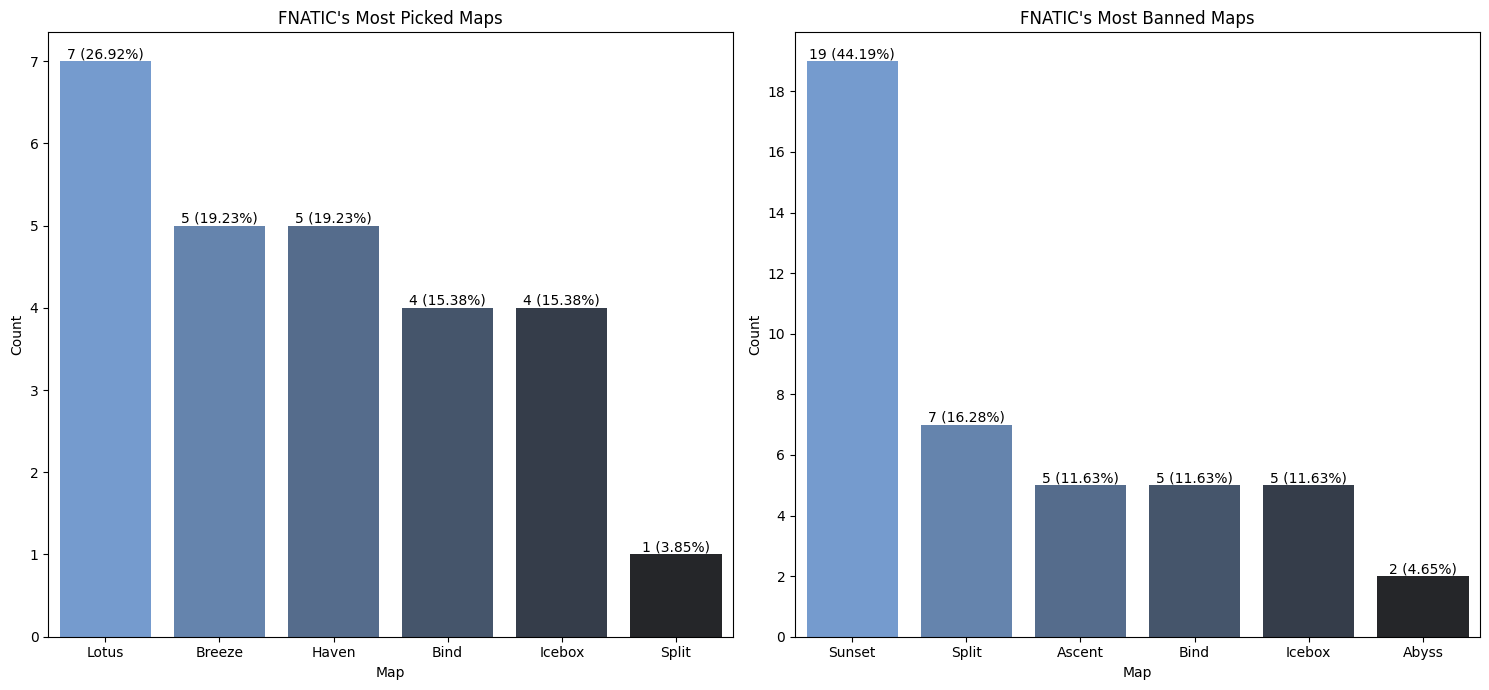

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
colors = sns.dark_palette("#69d", reverse=True)

sns.barplot(x='Map', y='Count', data=top_picked, ax=axes[0], palette=colors)
axes[0].set_title(f"{picked_team}'s Most Picked Maps")
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Map')

# Add pick percentage on top of each bar
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f} ({(p.get_height() / total_picks * 100):.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.barplot(x='Map', y='Count', data=top_banned, ax=axes[1], palette=colors)
axes[1].set_title(f"{picked_team}'s Most Banned Maps")
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Map')
axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))

# Add ban percentage on top of each bar
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.0f} ({(p.get_height() / total_bans * 100):.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()